# Weather Trends Analysis - Stockholm city

In this project, I will analyze local and global temperature data and compare the temperature trends in Stockholm city to overall global temperature trends.

## Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Stockholm.csv")

In [3]:
df.head()

,year,global_avg_temp,city_avg_temp
0,1750,8.72,7.35
1,1751,7.98,6.46
2,1752,5.78,3.08
3,1753,8.39,6.18
4,1754,8.47,6.16


In [29]:
# Add percentage change in the average temperatures 

df['global_pct_change'] = df['global_avg_temp'].pct_change()
df['city_pct_change'] = df['city_avg_temp'].pct_change()

In [30]:
df.head()

,year,global_avg_temp,city_avg_temp,global_pct_change,city_pct_change
0,1750,8.72,7.35,NaN,NaN
1,1751,7.98,6.46,-0.084862,-0.121088
2,1752,5.78,3.08,-0.275689,-0.523220
3,1753,8.39,6.18,0.451557,1.006494
4,1754,8.47,6.16,0.009535,-0.003236


## Dataset Analysis

### Stockholm's and global average temperatures over time

In [57]:
# basic stats
df.describe()

,year,global_avg_temp,city_avg_temp
count,264.000000,264.000000,264.000000
mean,1881.500000,8.359394,6.402159
std,76.354437,0.575184,0.944810
min,1750.000000,5.780000,3.080000
25%,1815.750000,8.077500,5.810000
50%,1881.500000,8.365000,6.345000
75%,1947.250000,8.700000,7.060000
max,2013.000000,9.730000,8.490000


In general, the temperature in Stockholm is lower than average. 

**Global** average temperature varies from 5.78°C (min) to 9.73°C (max) with mean close to 8.36°C, while **Stockholm's** average temperature varies from 3.08°C (min) to 8.49°C (max) with mean close to 6.40°C. Stockholm is approx. 2°C colder than global average.

In [58]:
# calculte moving average for 25 years
df_moving_average = df.rolling(window=25).mean()

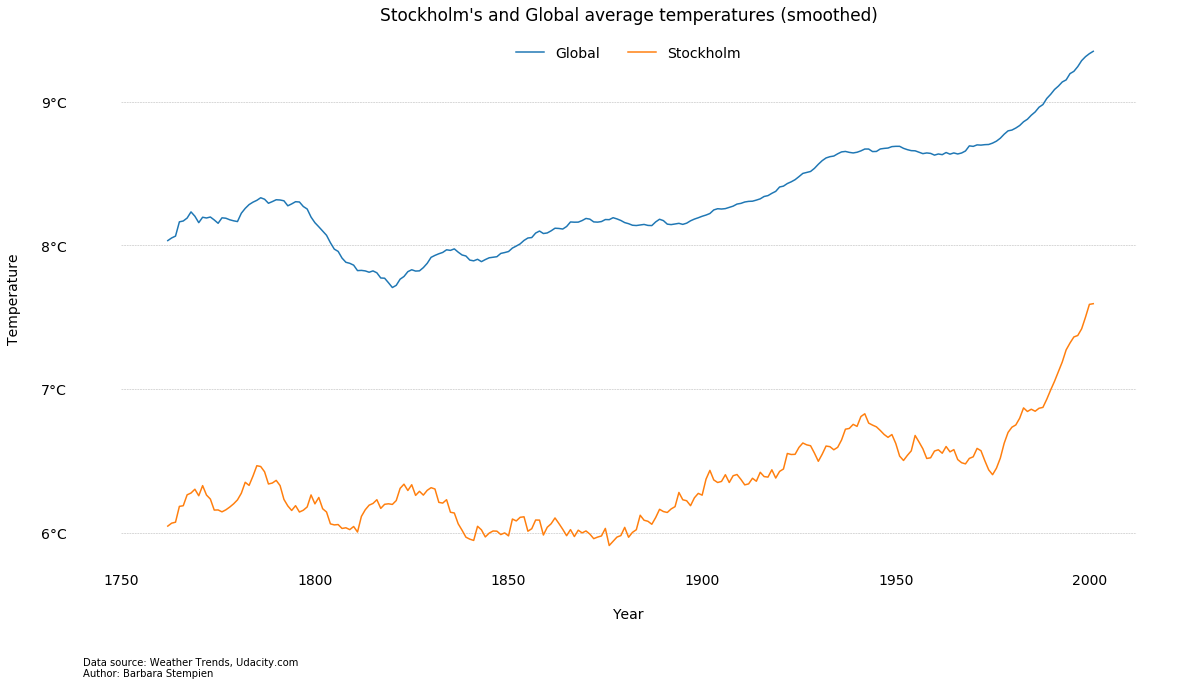

In [59]:
# plot global and Stockholm's data
plt.figure(figsize=(20, 10)) 

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

plt.yticks(range(6, 10, 1), 
           [str(x) + "°C" for x in range(6, 10, 1)], 
           fontsize=14)    
plt.xticks(fontsize=14)   

for y in range(6, 10, 1):    
    plt.plot(range(1750, 2013), 
             [y] * len(range(1750, 2013)), 
             "--", lw=0.5, color="black", alpha=0.3)  

ax.tick_params(axis='both', which='both', length=0)

plt.plot(df_moving_average['year'], 
         df_moving_average['global_avg_temp'],
         label='Global')
plt.plot(df_moving_average['year'],
         df_moving_average['city_avg_temp'],
         label='Stockholm')
plt.legend(frameon=False,
           loc='upper center',
           ncol=2,
           fontsize=14,
           borderaxespad=1)
plt.title("Stockholm's and Global average temperatures (smoothed)",
          fontsize=17,
          ha="center")
plt.xlabel("Year",
           fontsize=14,
           labelpad=20)
plt.ylabel("Temperature", fontsize=14, labelpad=20)
plt.text(1740, 5, "Data source: Weather Trends, Udacity.com"    
       "\nAuthor: Barbara Stempien", fontsize=10)
plt.show()

The above plot shows global and Stockholm's average temperatures in the last 250+ years (from 1750 to 2013).

In general, **Stockholm is much colder** than the global average but both global and city **average temperatures have been increasing**.

The difference between Stockholm's average temperatures and global average temperatures seem to be consistent over time, however, we can notice two periods, which seem to have opposite trends:
 * period between 1800 and 1850 - Stockholm's average temperature was initially increasing to later decease, while the global average temperature was decreasing to later slightly increase
 * period between 1950 and 1975 - Stockholm's average temperature was decreasing while the global average temperature was steadily increasing

We will have a closer look at these two periods later on.

Another observation we can make is that in the last 38 years (1975 - 2013), **Stockholm's average temperature was growing faster than the global average temperature**. We will look at this trend in details shortly.

### Stockholm's and global average temperatures - 1800 to 1850 window

In [14]:
# filter data
mask_1800_1850 = df['year'].between(1800, 1850, inclusive=True)
df_1800_1850 = df[mask_1800_1850]

In [24]:
# basic stats
df_1800_1850.describe()

,year,global_avg_temp,city_avg_temp
count,51.000000,51.000000,51.000000
mean,1825.000000,7.890000,6.083529
std,14.866069,0.523553,0.808104
min,1800.000000,6.860000,4.140000
25%,1812.500000,7.605000,5.605000
50%,1825.000000,7.900000,6.100000
75%,1837.500000,8.320000,6.565000
max,1850.000000,8.840000,8.210000


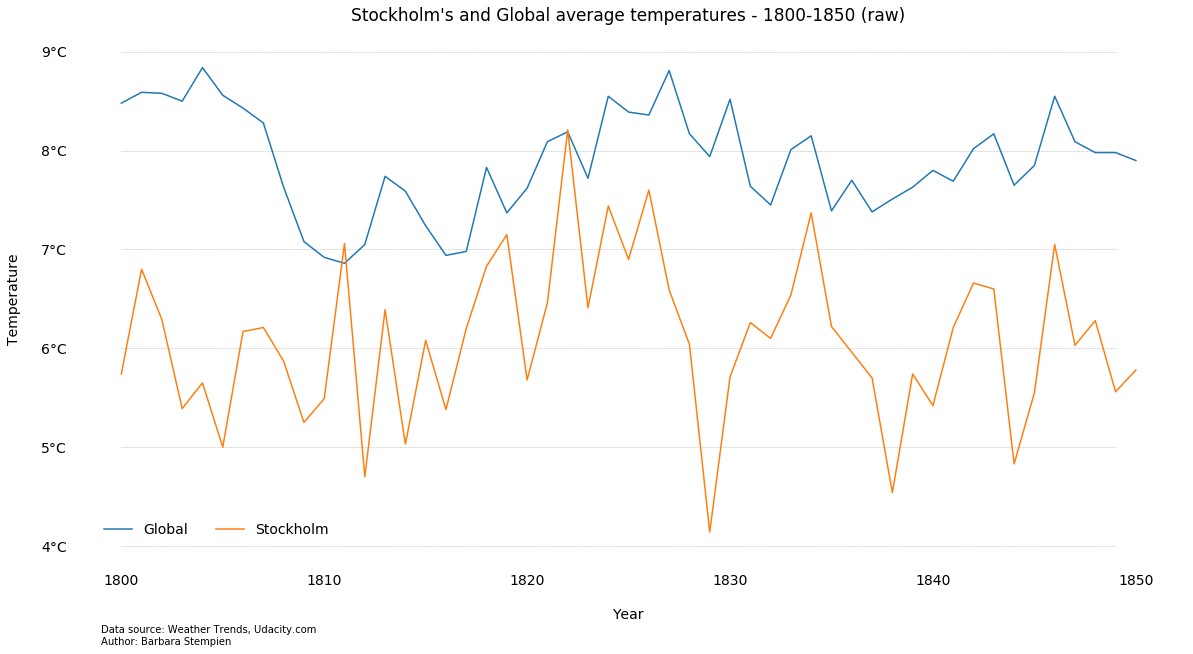

In [16]:
# plot data
plt.figure(figsize=(20,10)) 

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

plt.yticks(range(4, 10, 1),
           [str(x) + "°C" for x in range(4, 10, 1)], 
           fontsize=14)    
plt.xticks(fontsize=14)   

for y in range(4, 10, 1):    
    plt.plot(range(1800, 1850), 
             [y] * len(range(1800, 1850)),
             "--", lw=0.5, color="black", alpha=0.3)  

ax.tick_params(axis='both', which='both', length=0)

plt.plot(df_1800_1850['year'],
         df_1800_1850['global_avg_temp'],
         label='Global')
plt.plot(df_1800_1850['year'],
         df_1800_1850['city_avg_temp'],
         label='Stockholm')
plt.legend(frameon=False,
           loc='lower left',
           ncol=2,
           fontsize=14,
           borderaxespad=2)
plt.title("Stockholm's and Global average temperatures - 1800-1850 (raw)",
          fontsize=17,
          ha="center")
plt.xlabel("Year", fontsize=14, labelpad=20)
plt.ylabel("Temperature", fontsize=14, labelpad=20)
plt.text(1799, 3, "Data source: Weather Trends, Udacity.com"    
       "\nAuthor: Barbara Stempien", fontsize=10)
plt.show()

The period between 1800 - 1850 seems to be interesting due to some heat and cold waves. Stockholm's temperature during this period was approx. 1.8°C lower than the global average, which is still close to the overall difference of -2°C. 

However, we can see on the plot that there were few 'heat and cold waves'. In 1822 Stockholm's temperature was almost the same as the global average temperature - 8.21°C vs 8.19°C respectively. It was also the highest temperature recorded in Stockholm during this period.

We can also see 'cold waves', like the one in 1829, when the average temperature in Stockholm was 4.14°C compared to the global average of 7.94°C.

### Stockholm's and global average temperatures - 1950 to 1975 window

In [17]:
# filter data
mask_1950_1975 = df['year'].between(1950, 1975, inclusive=True)
df_1950_1975 = df[mask_1950_1975]

In [25]:
# basic stats
df_1950_1975.describe()

,year,global_avg_temp,city_avg_temp
count,26.000000,26.000000,26.000000
mean,1962.500000,8.635385,6.620769
std,7.648529,0.158776,0.800050
min,1950.000000,8.280000,5.250000
25%,1956.250000,8.537500,5.965000
50%,1962.500000,8.630000,6.595000
75%,1968.750000,8.737500,7.205000
max,1975.000000,8.950000,8.270000


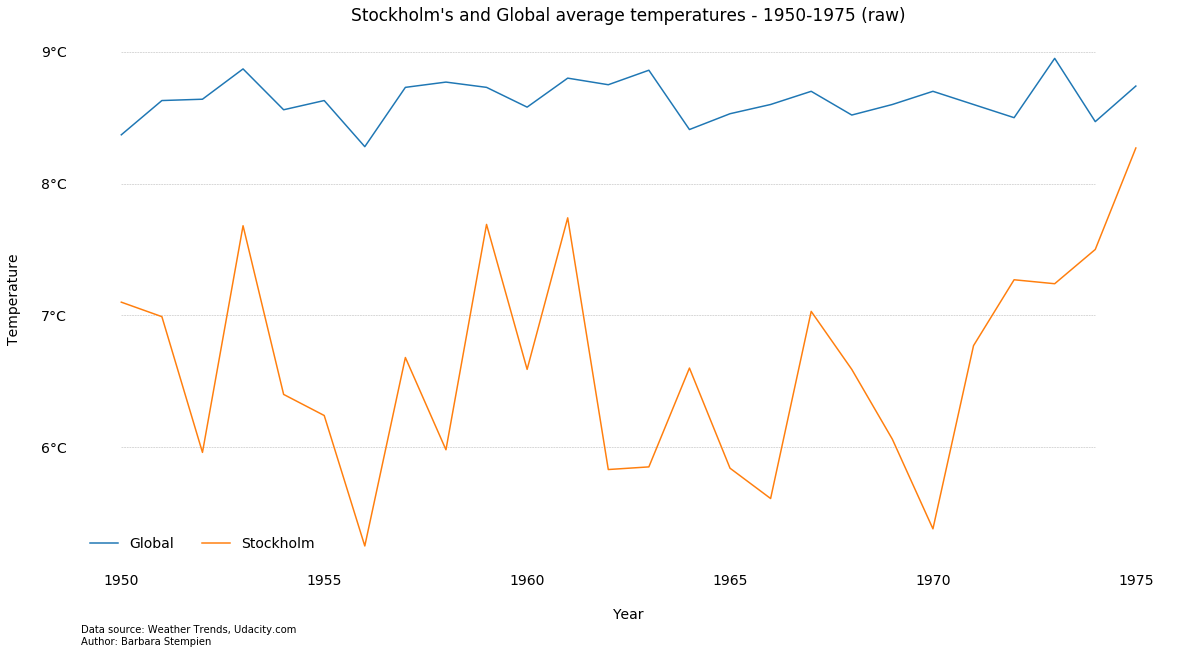

In [19]:
# plot data
plt.figure(figsize=(20,10)) 

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

plt.yticks(range(6, 10, 1),
           [str(x) + "°C" for x in range(6, 10, 1)], 
           fontsize=14)    
plt.xticks(fontsize=14)   

for y in range(6, 10, 1):    
    plt.plot(range(1950, 1975), 
             [y] * len(range(1950, 1975)), 
             "--", lw=0.5, color="black", alpha=0.3)  

ax.tick_params(axis='both', which='both', length=0)

plt.plot(df_1950_1975['year'],
         df_1950_1975['global_avg_temp'],
         label='Global')
plt.plot(df_1950_1975['year'],
         df_1950_1975['city_avg_temp'],
         label='Stockholm')
plt.legend(frameon=False,
           loc='lower left',
           ncol=2,
           fontsize=14,
           borderaxespad=1)
plt.title("Stockholm's and Global average temperatures - 1950-1975 (raw)",
          fontsize=17,
          ha="center")
plt.xlabel("Year", fontsize=14, labelpad=20)
plt.ylabel("Temperature", fontsize=14, labelpad=20)
plt.text(1949, 4.5, "Data source: Weather Trends, Udacity.com"    
       "\nAuthor: Barbara Stempien", fontsize=10)
plt.show()

Another interesting period falls between 1950 - 1975. Stockholm's temperature during this period was variable, while the global average was rather stable - standard deviation of ~0.16 and ~0.80 respectively.

On this plot, we can also notice better the beginning of the warming process. Since 1970 Stockholm's average temperature is continuously growing and moving closer and closer to the global average. Stockholm is getting hotter.

### Stockholm's and global average temperatures - 1970 to 2013 window

In [41]:
# filter data
mask_1970_2013 = df['year'].between(1970, 2013, inclusive=True)
df_1750_1969 = df[~mask_1970_2013]
df_1970_2013 = df[mask_1970_2013]

In [36]:
# basic stats for this period
df_1970_2013.describe()

,year,global_avg_temp,city_avg_temp
count,44.000000,44.000000,44.000000
mean,1991.500000,9.102727,7.122955
std,12.845233,0.378285,0.945001
min,1970.000000,8.350000,4.850000
25%,1980.750000,8.807500,6.312500
50%,1991.500000,9.105000,7.255000
75%,2002.250000,9.450000,7.775000
max,2013.000000,9.730000,8.490000


In [42]:
# basic stats previous period
df_1750_1969.describe()

,year,global_avg_temp,city_avg_temp
count,220.000000,220.000000,220.0000
mean,1859.500000,8.210727,6.2580
std,63.652704,0.485791,0.8783
min,1750.000000,5.780000,3.0800
25%,1804.750000,7.980000,5.6900
50%,1859.500000,8.250000,6.2500
75%,1914.250000,8.550000,6.8825
max,1969.000000,9.430000,8.3900


In [52]:
# get a row from the full dataset with max Stockholm's avg temperature
df[df['city_avg_temp'] == df['city_avg_temp'].max()]

,year,global_avg_temp,city_avg_temp
258,2008,9.43,8.49


In [53]:
# get a row from the full dataset with max global avg temperature 
df[df['global_avg_temp'] == df['global_avg_temp'].max()]

,year,global_avg_temp,city_avg_temp
257,2007,9.73,8.16


In [54]:
# get a row from the full dataset with min global avg temperature 
df[df['global_avg_temp'] == df['global_avg_temp'].min()]

,year,global_avg_temp,city_avg_temp
2,1752,5.78,3.08


In [56]:
# get a row from this period with min global avg temperature 
df_1970_2013[df_1970_2013['global_avg_temp'] == df_1970_2013['global_avg_temp'].min()]

,year,global_avg_temp,city_avg_temp
226,1976,8.35,6.06


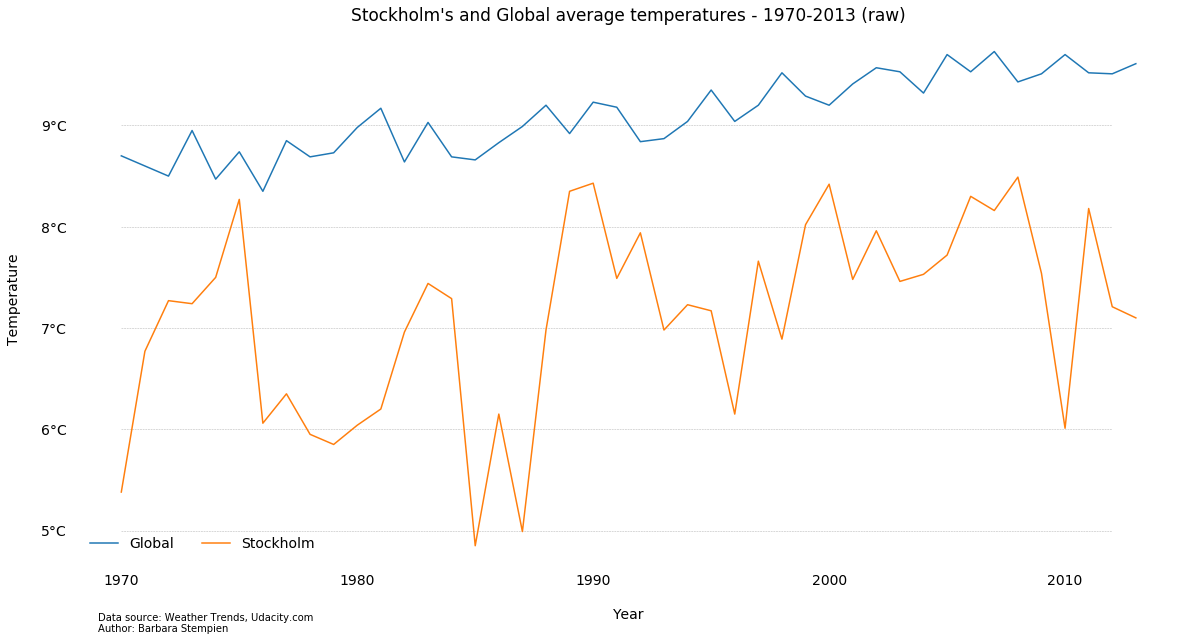

In [38]:
# plot data
plt.figure(figsize=(20,10)) 

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

plt.yticks(range(5, 10, 1), 
           [str(x) + "°C" for x in range(5, 10, 1)], 
           fontsize=14)    
plt.xticks(fontsize=14)   

for y in range(5, 10, 1):    
    plt.plot(range(1970, 2013), 
             [y] * len(range(1970, 2013)), 
             "--", lw=0.5, color="black", alpha=0.3)  

ax.tick_params(axis='both', which='both', length=0)

plt.plot(df_1970_2013['year'], 
         df_1970_2013['global_avg_temp'], 
         label='Global')
plt.plot(df_1970_2013['year'], 
         df_1970_2013['city_avg_temp'], 
         label='Stockholm')
plt.legend(frameon=False, 
           loc='lower left', 
           ncol=2, 
           fontsize=14, 
           borderaxespad=1)
plt.title("Stockholm's and Global average temperatures - 1970-2013 (raw)", 
          fontsize=17, 
          ha="center")
plt.xlabel("Year", fontsize=14, labelpad=20)
plt.ylabel("Temperature", fontsize=14, labelpad=20)
plt.text(1969, 4, "Data source: Weather Trends, Udacity.com"    
       "\nAuthor: Barbara Stempien", fontsize=10)
plt.show()

The period starting from 1970 shows an increase in the average temperatures globally and in Stockholm city. The global average temperature for this period is 9.10°C compared to 8.21°C the in the previous years, while average temperature for Stockholm is 7.12°C compared to 6.26°C in the previous years.

In this period, we recorded the highest average temperature for **Stockholm**, it was 8.49°C (2008). Moreover, the minimum average temperature in this period was 4.85°C compared to 3.08°C in previous years. If we look at the quartiles, we will see the same trend - the average temperatures are increasing - for 25% temperature was 6.31°C in this period compared to 5.69°C in the previous. For 50% it was 7.26°C compared to 6.25°C, while for 75% it was 7.78°C compared to 6.88°C.

The exact same trend can be observed for **Global** average temperatures. The maximum global average temperature was recorded in 2007 and was 9.73°C. At the same time, the minimum temperature of 8.35°C, recorded in 1976, was much higher than 5.78°C - the minimum temperature recorded in the previous years (1752). If we look at the quartiles for global data, we will see the same trend with the average temperatures increasing - for 25% we can see 8.8°C in this period compared to 7.98°C in the previous. For 50% it was 9.1°C vs 8.25°C, while for 75% it was 9.45°C compared to 8.55°C.


As a general conclusion, we can say that Stockholm and the rest of the world are getting **hotter**.

### What's the correlation coefficient?

In [60]:
df.corr()

,year,global_avg_temp,city_avg_temp
year,1.000000,0.612115,0.333343
global_avg_temp,0.612115,1.000000,0.496454
city_avg_temp,0.333343,0.496454,1.000000


Strength of association is medium: 0.5.